In [1]:
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
print(tf.__version__)
import keras
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

import random
import pandas as pd
import numpy as np
import cv2

from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt
from matplotlib import image as mpimg
%matplotlib inline
import seaborn as sns

import os
#print(os.listdir("../input"))
print(os.listdir("."))

1.14.0


Using TensorFlow backend.


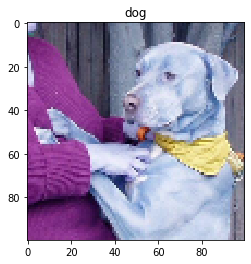

In [11]:
main_dir = "."
train_dir = "train"
path = os.path.join(main_dir, train_dir)

def display_picture(index):
    category = os.listdir(path)[index].split(".")[0]
    img_array = cv2.imread(os.path.join(path, os.listdir(path)[index]))
    img_array = cv2.resize(img_array, dsize=(100, 100))
    plt.imshow(img_array, cmap="gray")
    plt.title(category)
    
def random_picture():
    img = load_img("./train/"+random.choice(os.listdir("./train")))
    plt.imshow(img)
    
display_picture(6)
#random_picture()

In [12]:
HEIGHT = 128
WIDTH = 128
IMG_SIZE = (HEIGHT, WIDTH)
CHANNELS = 3 #RGB

In [13]:
"""
def create_data(path):
    labels = []
    convert = lambda category : category=="dog"
    for picture in os.listdir(path):
        category = picture.split(".")[0]
        if convert(category):
            labels.append(1)
        else:
            labels.append(0)
    df = pd.DataFrame({"file": os.listdir(path), "label": labels})
    label = lambda category: "cat" if category==0 else "dog"
    df["label"] = list(map(label, df["label"]))
    return df
"""
X = []
y = []
def create_test_data(path):
    convert = lambda category : int(category == 'dog')
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_UNCHANGED)
        img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
        img_array = cv2.resize(img_array, (HEIGHT, WIDTH))
        X.append(img_array)
        y.append(category)

In [14]:
create_test_data(path)

In [15]:
X = np.array(X)
y = np.array(y)

print(X.shape)
print(y.shape)

(25000, 128, 128, 3)
(25000,)


In [ ]:
train_df, validation_df = train_test_split(df, test_size=0.2)
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [ ]:
validation_df.shape

In [16]:
model = tf.keras.models.Sequential([
    #tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=X.shape[1:]),
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(WIDTH, HEIGHT, CHANNELS)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2, 2), 
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"), 
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(), 
    tf.keras.layers.Dense(512, activation="relu"), 
    tf.keras.layers.Dense(1, activation="sigmoid")  
])

W0807 17:05:07.898220 4469142976 deprecation.py:506] From /Users/samsonqian/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 128)       7

In [ ]:
"""
earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callback = [earlystop, learning_rate_reduction]
"""

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss="binary_crossentropy",
              metrics = ["acc"])

In [ ]:
"""
BATCH_SIZE = 15

train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/train/train/", 
    x_col="file",
    y_col="label",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE
)

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_dataframe(
    validation_df, 
    "../input/train/train/", 
    x_col="file",
    y_col="label",
    target_size=IMG_SIZE,
    class_mode="categorical",
    batch_size=BATCH_SIZE
)
"""

In [ ]:
EPOCHS = 5
BATCH_SIZE = 1000

history = model.fit(X, y, epochs=EPOCHS, batch_size=BATCH_SIZE, validation_split=0.2)
"""
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=EPOCHS,
                              validation_steps=50,
                              #callbacks=callback,
                              verbose=2)
"""

In [ ]:
epochs = range(len(history.history["acc"]))

plt.plot(epochs, history.history["acc"])
plt.plot(epochs, history.history["val_acc"])
plt.title("Training and validation accuracy")
plt.figure()

plt.plot(epochs, history.history["loss"])
plt.plot(epochs, history.history["val_loss"])
plt.title("Training and validation loss")